In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

**<b> QUESTION 1**

In [54]:
df =pd.read_excel('quarterly.xls')
df.dropna() #On supprime les lignes qui ont une(ou des)données manquantes

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


Le set de data n'est pas exactement une série temporelle à cause des YearQ, je veux la transformer en série temporelle (notamment pour un affichage plus propre des graphiques qui pourront porter une échelle avec des nombres): 

In [55]:
df["DATE"] = pd.date_range(start = "1960/01", end = "2012/12", freq= "3 m")

**<b>QUESTION 2**
    
    On a la formule suivante pour l'inflation :
$inf=100\frac{CPI(final)-CPI(initial)}{CPI(initial)}$ 

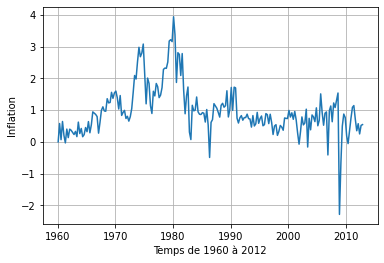

In [56]:
cpi=df["CPI"]

inf=np.zeros(len(cpi))

for i in range(1,len(cpi)):
    inf[i]= 100*(cpi[i]-cpi[i-1])/cpi[i-1]
    
plt.plot(df.DATE,inf)
plt.xlabel('Temps de 1960 à 2012')
plt.ylabel('Inflation')
plt.grid()
plt.show()

On constate que le taux d'inflation augmente globalement de 1960 à 1980 avec deux pics dans les années 70 surement dûs à la flambée des prix avec la crise du pétrole. Il descend ensuite jusqu'aux années 2010. Notons un pic minimun juste avant 2010, celui correspond à la crise des supbrimes.

**<b>QUESTION 3**

**<B> Autocorrélogramme de inf:**

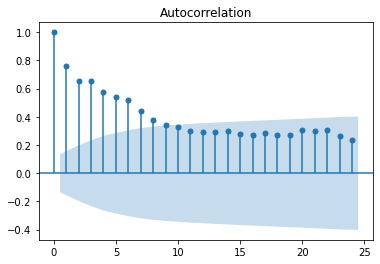

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(inf)
plt.show()


**<b> Autocorrolégramme partiel de inf:**

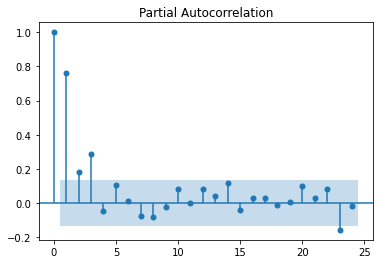

In [58]:
plot_pacf(inf)
plt.show()

On sait que : 

    "Fonction d'autocorrélation (ACF): Au décalage k, il s'agit de la corrélation entre les valeurs de séries   
    séparées par k intervalles.
    Fonction d'autocorrélation partielle (PACF): Au décalage k, il s'agit de la corrélation entre les valeurs de 
    séries séparées par k intervalles, compte tenu des valeurs des intervalles intermédiaires."
    
On remarque ici que l'autocorrélation est maximale pour un décalage nul et diminue progressivement.
L'autocorrélation partielle est également maximale pour un décalage k = 0 ou 1 mais devient très vite nul. 

Cela veut donc dire qu'une série à un temps t est surtout influencée par la serie précente de t-1 à t-4.

**<B>QUESTION 4**

Une série est **<b>stationnaire</b>** s'il un existe un temps t à partir du quel les séries sont ( à peu près) égales.

Une série est **<b>ergodique</b>** si, à partir d'un temps t, elle ne dépend plus de ses conditions initiales: son autocorrélation d'ordre k tend vers 0 lorsque k tend vers l'infini.

Ces conditions sont nécessaires pour effectuer une bonne régression mais également pour appliquer le théorème ergodique qui nous permet d'estimer l'espérérance du processus par la moyenne d'un echantillon suffisament grand.

**<b>QUESTION 5**

On veut une modélisation de AR(p) de inf, on va faire une boucle de 1 à 10 de p pour trouver p minimisant AIC et BIC

p: 1  AIC: -1.3573600145032916  BIC: -1.3097032637903618
p: 2  AIC: -1.3773568402690743  BIC: -1.3136024111125513
p: 3  AIC: -1.4580738661155512  BIC: -1.3781137165470152
p: 4  AIC: -1.4511099375385326  BIC: -1.3548348006240716
p: 5  AIC: -1.4576419321669698  BIC: -1.3449412966459189
p: 6  AIC: -1.4436368322145066  BIC: -1.31439892274695
p: 7  AIC: -1.4338342179837467  BIC: -1.2879459749971824
p: 8  AIC: -1.426725260219147  BIC: -1.2640723193444305
p: 9  AIC: -1.4124265339458393  BIC: -1.232893205032245


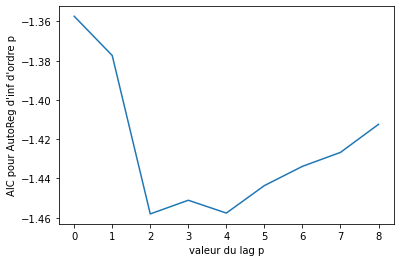

On souhaite maximiser la vraisemblance.
Le lag p qui minimise le critère d'information AIC de la modélisation AutoReg(inf,p) est 3
Nous proposons une modélisation AR( 3 ):
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                  212
Model:                          AR(3)   Log Likelihood                -139.189
Method:                          cmle   S.D. of innovations              0.471
Date:                Sun, 21 Nov 2021   AIC                             -1.458
Time:                        23:12:44   BIC                             -1.378
Sample:                             0   HQIC                            -1.426
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1427      0.057      

In [59]:
import warnings
warnings.filterwarnings('ignore')
    
import statsmodels.tsa.api as smt 

AIC=[]
for p in range(1,10): 
    mdl = smt.AR(inf).fit(maxlag=p) 
    AIC.append(mdl.aic)
    print('p:', p, ' AIC:', mdl.aic, ' BIC:', mdl.bic)
    
plt.plot(AIC)
plt.xlabel('valeur du lag p')
plt.ylabel("AIC pour AutoReg d'inf d'ordre p")
plt.show()

print("On souhaite maximiser la vraisemblance." )
print("Le lag p qui minimise le critère d'information AIC de la modélisation AutoReg(inf,p) est", AIC.index(min(AIC))+1)
print("Nous proposons une modélisation AR(",AIC.index(min(AIC))+1,"):")
print(smt.AR(inf).fit(maxlag=3).summary())



**<B>QUESTION 6**

On applique la méthode des moindres carrés à la courbe de Philipps expliquant le taux de chomage en fonction de l'inflation :

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02604
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.872
Time:                        23:12:45   Log-Likelihood:                -401.84
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0593      0.179     33.774      0.0

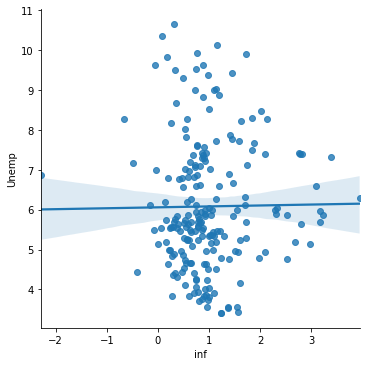

In [60]:
import seaborn as sns
import statsmodels.api as sm

const=np.ones(np.shape(df)[0]) 

unemp=df['Unemp']
df['inf']=inf 

model=sm.OLS(unemp,np.column_stack((const,inf))).fit()

print(model.summary())

sns.lmplot(x='inf',y='Unemp',data=df) #This function combines regplot() and FacetGrid. 
#It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.



Le modèle de la courbe de Philipps est donc de type affine : $Unemp =6,059 + 0.023Inf$

**<b>QUESTION 7**
   

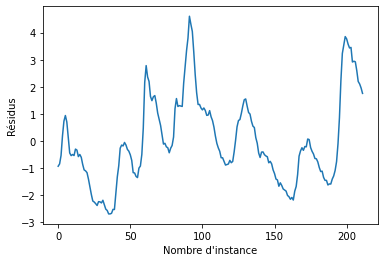

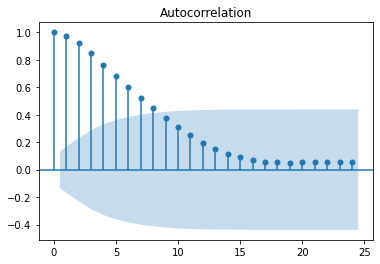

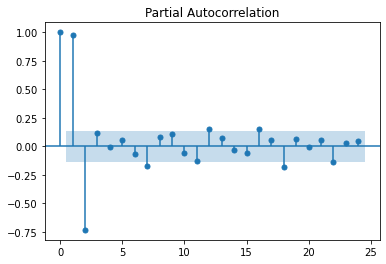

In [61]:
plt.plot(model.resid)
plt.ylabel('Résidus')
plt.xlabel("Nombre d'instance")
plot_acf(model.resid)
plot_pacf(model.resid)

plt.show()

Pour une modélisation AR(1), le cours nous informe que les résidus sont du type: $u_{t}= \rho u_{t-1} + e_{t}$

On a l'hypothèse nulle $H_{0}$: $\rho=0$
et l'hypothèse contraire  $H_{1}$: $\rho \ne0$

Pour cela, nous utilisons le test de Durbin-Watson, qui, rappelons le : " cherche à vérifier la significativité du coefficient $\rho$ "

On pourrait utiliser la fonction statsmodels.stats.stattools.durbin_watson, mais de fait, l'OLS regression results présenté à la QUESTION 6 affiche déjà le résultat: 



In [62]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02604
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.872
Time:                        23:12:54   Log-Likelihood:                -401.84
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0593      0.179     33.774      0.0

On lit un résultat pour le test de Durbin-Watson de $DW=0.044$.

On a également une p-value nulle donc on **<b>on rejette l'hypothèse nulle, l'autocorrélation des erreurs est non-nulle**

**<b>QUESTION 8**

On a vu au cours 6 que $DW\approx 2(1-\hat{\rho})$

En connaissant la valeur de $\hat{\rho}$ désormais avec MCO, on peut corriger l'autocorrélation en transformant les variables:

In [63]:
DW=0.044
rho_estimé=1-(DW/2)

n = np.shape(df)[0]

#On transforme inf 
inf_corrrected = np.zeros(n) 
inf_corrrected[0] = (np.sqrt(1 - rho_estimé*rho_estimé)*inf[0])
for i in range(1,n): 
    inf_corrrected[i]=inf[i]-rho_estimé*inf[i-1]
    
#On transforme unemp
unemp_corrrected = np.zeros(n) 
unemp_corrrected[0] = (np.sqrt(1 - rho_estimé*rho_estimé)*unemp[0])
for i in range(1,n): 
    unemp_corrrected[i]=unemp[i]-rho_estimé*unemp[i-1]
    


    
#On refait une MCO   
model_corrected = sm.OLS(unemp_corrrected,np.column_stack((const,inf_corrrected))).fit() 
print(model_corrected.summary()) 

u=model_corrected.resid

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5.006
Date:                Sun, 21 Nov 2021   Prob (F-statistic):             0.0263
Time:                        23:13:03   Log-Likelihood:                -70.295
No. Observations:                 212   AIC:                             144.6
Df Residuals:                     210   BIC:                             151.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1532      0.023      6.577      0.0

On peut verifier qu'on a bien corrigé l'autocorrélation des erreurs:



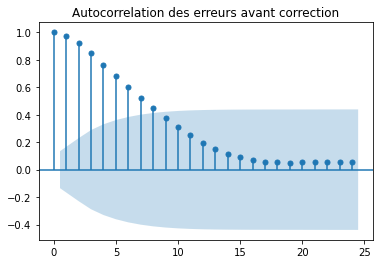

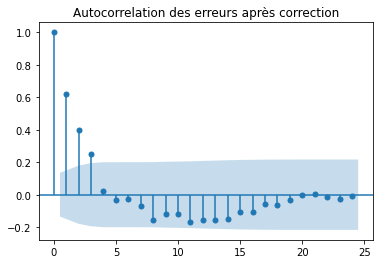

In [64]:
plot_acf(model.resid)
plt.title('Autocorrelation des erreurs avant correction')
plot_acf(model_corrected.resid)
plt.title('Autocorrelation des erreurs après correction')

plt.show()

 **<b> QUESTION 9**

On veut tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique. 

Pour cela, on divise inf et unemp en 2 liste de même taille. 

Ensuite, on va effectuer un test de Chow pour tester l'hypothèse $H_{0}$: "Couper en deux sous-périodes de taille identique n'apporte pas d'amélioration"

On effectue un test de Fisher sur les deux SSR créés ($k=2$ variables et 1 contrainte)


In [65]:
import statsmodels.api as sm
from scipy.stats import f

mid = int(n/2)

inf1 = inf_corrrected[:mid]
inf2 = inf_corrrected[mid:]


unemp1 = unemp_corrrected[:mid]
unemp2 = unemp_corrrected[mid:]

const_new = np.ones(mid)

SSR = u.T @u

X1 = np.column_stack((const_new, inf1))
Y1 = unemp1
Beta1 = np.linalg.inv(X1.T @ X1)@X1.T@Y1
u1 = Y1 - X1@Beta1

SSR1 = u1.T @ u1


X2 = np.column_stack((const_new, inf2))
Y2 = unemp2
Beta2 = np.linalg.inv(X2.T @ X2)@X2.T@Y2
u2 = Y2 - X2@Beta2

SSR2 = u2.T @ u2





On calcule maintenant la statistique de Fisher:

In [66]:
k=2 #Nombre de variables en jeu 

F = ((SSR - (SSR1 + SSR2))/k)/((SSR1 + SSR2)/(n - 2*k))

print("Statistique Fisher F vaut:")
print(F)
print("p-value vaut: ")
print(f.sf(F, 2, n - 2*2))

Statistique Fisher F vaut:
4.208184015012401
p-value vaut: 
0.01615905614021596


On voit que la p-value est sous 5% donc on rejette l'hypothèse $H_{0}.

Cela veut dire que la relation inflation-chomage n'est pas stable.

**<B>QUESTION 10**

On veut estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais 
en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage.

In [67]:
#On ajoute un délai sur unemp (on perd 4 valeurs)
unemp1=df.Unemp[2:n-4] 
unemp2=df.Unemp[3:n-3] 
unemp3=df.Unemp[4:n-2] 
unemp4=df.Unemp[5:n-1] 

#De même avec les transposées de inf
inf1=inf.T[2:n-4] 
inf2=inf.T[3:n-3] 
inf3=inf.T[4:n-2] 
inf4=inf.T[5:n-1] 

On construit maintenant la nouvelle courbe de Philips:

In [68]:
X=np.column_stack((unemp1,unemp2,unemp3,unemp4)) 
M=df.Unemp[1:n-5] 
beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(M) 
unemp=X.dot(beta) 

Y=np.column_stack((inf1,inf2,inf3,inf4,unemp1,unemp2,unemp3,unemp4)) 
beta2=np.linalg.inv(Y.T.dot(Y)).dot(Y.T).dot(M) 
unemp2=Y.dot(beta2)

On peut tracer cette courbe de Philips:

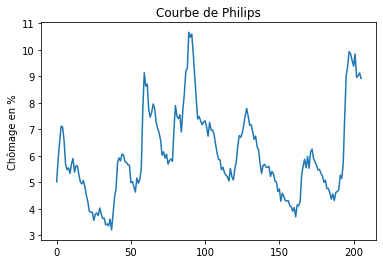

In [69]:
plt.plot(unemp2) 
plt.ylabel("Chômage en %") 
plt.title("Courbe de Philips") 
plt.show()

On va maintenant effectuer le test de Granger de non causalité de l’inflation sur le chômage.

On s'intéresse donc au modèle :

$unemp_{t} = const +\alpha_{1} inf_{t-1} +\alpha_{2} inf_{t-2} +\alpha_{3} inf_{t-3} +\alpha_{3} inf_{t-4} +\beta Unemp_{t} +\beta_{1} Unemp_{t-1} +\beta_{2} Unemp_{t-2} +\beta_{3} Unemp_{t-3} + \beta_{4}Unemp_{t-4}$

L'hypothèse nulle est donc $H_{0}:\alpha_{1}=\alpha_{2}=\alpha_{3}=\alpha_{4}=0$

On applique le test de Fisher avec 9 variables, 4 contraintes et n-5 observations:

In [75]:
u=df.Unemp[1:n-5]-unemp2 
SSR3=u.T.dot(u) 
 
u2=df.Unemp[1:n-5]-unemp 
SSR4=u2.T.dot(u2) 
 
F=((SSR4-SSR3)/SSR3)*(n-5-9)/4 


print("La statistique Fisher F vaut:")
print(F)
print("\n")
print("p-value vaut: ")
print(f.sf(F, 4, n - 5-9))


La statistique Fisher F vaut:
3.567222510323905


p-value vaut: 
0.007799066758745032


On rejette donc l'hypothèse nulle à 5%.

On peut donc conclure qu'il y a causalité entre ces délais et le chomâge.


**<b>QUESTION 11**

On trace ces délais distribués:


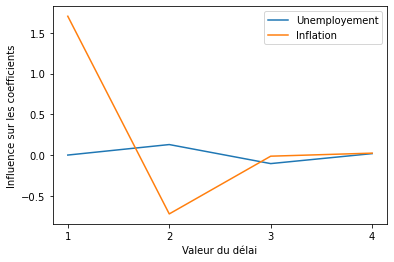

In [71]:
plt.plot([1,2,3,4],beta2[0:4]) 
plt.plot([1,2,3,4],beta2[4:8]) 
plt.legend(['Unemployement','Inflation'])
plt.xticks([1,2,3,4])
plt.xlabel("Valeur du délai") 
plt.ylabel("Influence sur les coefficients") 

plt.show()

On remarque donc que l'influence des délais distribués sur l'inemploi est bien plus importante lorsqu'elle est sur l'inemploi que sur l'inflation (ce que est prévisible). 
On remaque que la valeur maximale est pour un déphasage d'un et la minimale est pour un déphasage de 2.

On peut s'intéresser à la valeur de l'impact à long terme :

In [72]:
print ("La valeur de l'impact à long terme est", sum(beta2[0:4]))

La valeur de l'impact à long terme est 0.04131863856802653
